In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'DejaVu Sans'

plt.rcParams['text.usetex'] = True

/Library/Python/3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [-1 -2] in fill_betweenx(). This will become an error two minor releases later.


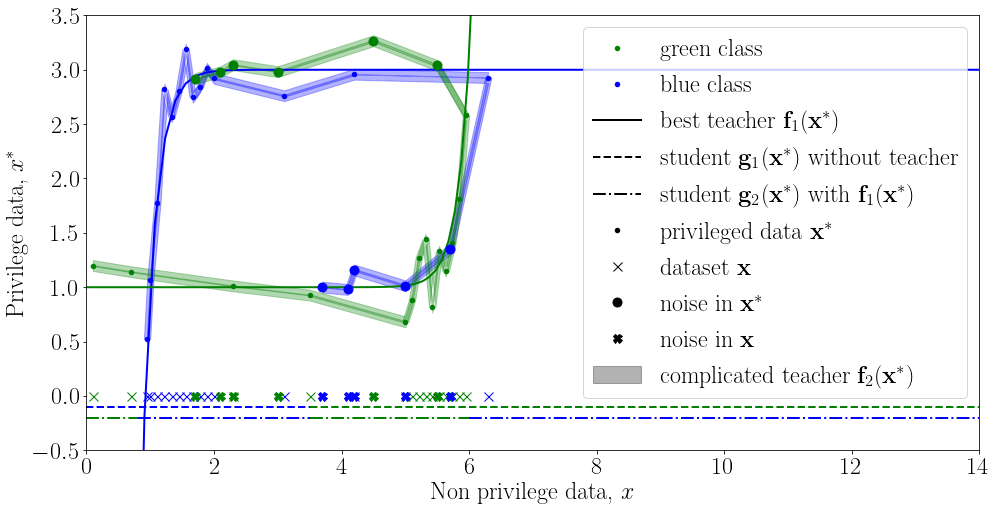

In [6]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 9
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (16.0, 8.0)
plt.rcParams['font.size'] = Text_size
#################################################

colors=['blue', 'green']
np.random.seed(5)

x_1 = np.linspace(-2, 14, 100)
x_2 = np.linspace(-2, 8, 100)

func_1 = lambda x:  1+2-300*np.exp(-5*x)
func_2 = lambda x:  1+2*1e-13*np.exp(5*x)

plt.plot([-1, -1], [-1, -1], '.', color=colors[1], label='green class')
plt.plot([-1, -1], [-1, -1], '.', color=colors[0], label='blue class')
plt.plot([-1, -1], [-1, -1], '-', color='black', label='best teacher $\mathbf{f}_1(\mathbf{x}^*)$')
plt.plot([-1, -1], [-1, -1], '--', color='black', label='student $\mathbf{g}_1(\mathbf{x}^*)$ without teacher')
plt.plot([-1, -1], [-1, -1], '-.', color='black', label='student $\mathbf{g}_2(\mathbf{x}^*)$ with $\mathbf{f}_1(\mathbf{x}^*)$')
plt.fill_between(np.array([-1, -2]), np.array([-1, -1]), np.array([-2, -2]), '-', color='black', alpha=0.3, label='complicated teacher $\mathbf{f}_2(\mathbf{x}^*)$')
plt.plot([-1, -1], [-1, -1], '.', color='black', label='privileged data $\mathbf{x}^*$')
plt.plot([-1, -1], [-1, -1], 'x', color='black', label='dataset $\mathbf{x}$')
plt.plot([-1, -1], [-1, -1], 'o', color='black', label='noise in $\mathbf{x}^*$')
plt.plot([-1, -1], [-1, -1], 'X', color='black', label='noise in $\mathbf{x}$')

plt.plot(x_1, func_1(x_1), '-', color=colors[0])
plt.plot(x_2, func_2(x_2), '-', color=colors[1])

points_1 = np.array(np.linspace(1,2, 10).tolist()+[3.1, 4.2, 6.3, 0.95])
points_2 = np.array(np.linspace(5,5.95, 10).tolist()+[0.1, 0.7, 2.3, 3.5])

y_1 = func_1(points_1) + 0.2*np.random.randn(len(points_1))
y_2 = func_2(points_2) + 0.2*np.random.randn(len(points_2))

plt.plot(points_1, y_1, '.', color=colors[0])
plt.plot(points_2, y_2, '.', color=colors[1])

plt.plot(points_1, y_1*0, 'x', color=colors[0])
plt.plot(points_2, y_2*0, 'x', color=colors[1])

noise_points_1 = np.array([3.7, 4.1, 4.2, 5.7, 5])
noise_points_2 = np.array([1.7, 2.1, 2.3, 5.5, 4.5, 3])

noise_y_1 = func_2(noise_points_1) + 0.2*np.random.randn(len(noise_points_1))
noise_y_2 = func_1(noise_points_2) + 0.2*np.random.randn(len(noise_points_2))

plt.plot(noise_points_1, noise_y_1, 'o', color=colors[0])
plt.plot(noise_points_2, noise_y_2, 'o', color=colors[1])

plt.plot(noise_points_1, noise_y_1*0, 'X', color=colors[0])
plt.plot(noise_points_2, noise_y_2*0, 'X', color=colors[1])


delta = 0.05
index_1 = np.argsort(points_1)
noise_index_1 = np.argsort(noise_points_1)[::-1]
plt.fill_between(np.array(points_1[index_1].tolist() + noise_points_1[noise_index_1].tolist()), np.array(y_1[index_1].tolist() + noise_y_1[noise_index_1].tolist())+delta, np.array(y_1[index_1].tolist() + noise_y_1[noise_index_1].tolist())-delta, color=colors[0], alpha=0.3)
plt.fill_betweenx(np.array(y_1[index_1].tolist() + noise_y_1[noise_index_1].tolist()), np.array(points_1[index_1].tolist() + noise_points_1[noise_index_1].tolist())+delta, np.array(points_1[index_1].tolist() + noise_points_1[noise_index_1].tolist())-delta, color=colors[0], alpha=0.3)

index_2 = np.argsort(points_2)
noise_index_2 = np.argsort(noise_points_2)[::-1]
plt.fill_between(np.array(points_2[index_2].tolist() + noise_points_2[noise_index_2].tolist()), np.array(y_2[index_2].tolist() + noise_y_2[noise_index_2].tolist())+delta, np.array(y_2[index_2].tolist() + noise_y_2[noise_index_2].tolist())-delta, color=colors[1], alpha=0.3)
plt.fill_betweenx(np.array(y_2[index_2].tolist() + noise_y_2[noise_index_2].tolist()), np.array(points_2[index_2].tolist() + noise_points_2[noise_index_2].tolist())+delta, np.array(points_2[index_2].tolist() + noise_points_2[noise_index_2].tolist())-delta, color=colors[1], alpha=0.3)

plt.plot([0,3.5], [-0.1,-0.1], '--', color=colors[0])
plt.plot([3.5,14], [-0.1,-0.1], '--', color=colors[1])

plt.plot([0,0.8], [-0.2,-0.2], '-.', color=colors[1])
plt.plot([0.8,3.5], [-0.2,-0.2], '-.', color=colors[0])
plt.plot([3.5,6.0], [-0.2,-0.2], '-.', color=colors[1])
plt.plot([6.0,14], [-0.2,-0.2], '-.', color=colors[0])

plt.ylabel('Privilege data, $x^*$')
plt.xlabel('Non privilege data, $x$')

plt.xlim((0, 14))
plt.ylim((-0.5, 3.5))

plt.legend(loc='best')

plt.savefig('./figures/explanation.jpg', bbox_inches='tight')
plt.show()